In [1]:
import rebound
import reboundx
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
#import ipywidgets as widgets
import numpy as np

In [2]:
sim = rebound.Simulation.from_file("checkpoint.bin")
sim.status()

---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Mar  9 2019 15:06:42
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0012246196513226696 y=0.007528875304464409 z=-4.529766384857568e-05 vx=-0.002977509060539432 vy=0.0005196272260244045 vz=7.716255120345911e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.041258932999459125 y=0.3143342414090862 z=0.028697467456984704 vx=-12.254319160571612 vy=-0.9553420041882094 vz=1.0458785453484094>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.42146563703371775 y=-0.5822813543687417 z=0.016112894679529973 vx=5.962294718483822 vy=-4.320328498402832 vz=-0.403452133194268>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.9283011176696948 y=0.3564081321895419 z=-5.846429717789078e-05 vx=-2.3186436741180527 vy=-5.904385726074369 vz=0.0003515866

In [3]:
Noutputs = 1000000
year = 10000 # One year in units where G=1
times = np.linspace(0.,year, Noutputs)
# x = np.zeros((2,Noutputs))
# y = np.zeros((2,Noutputs))
# z = np.zeros((2,Noutputs))
P_C = np.zeros((Noutputs))
P_E = np.zeros((Noutputs))
x = np.zeros((4,Noutputs))
y = np.zeros((4,Noutputs))
z = np.zeros((4,Noutputs))


In [4]:
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    if i % 10000 ==0:
        print(i)
        print(ps[3].orbit.P)
    sim.integrate(time)
    P_C[i] = ps[5].orbit.P
    P_E[i] = ps[5].orbit.e
    x[2][i] = ps[5].x   # Cruithne
    y[2][i] = ps[5].y
    z[2][i] = ps[5].z
    x[3][i] = np.copy(ps[3].x )  # Cruithne
    y[3][i] = np.copy(ps[3].y)
    z[3][i] = np.copy(ps[3].z)

0
1.000002903958304
10000
1.0000035618721854
20000
1.0000144257147194
30000
1.0000285894131087
40000
1.0000345107437727
50000
1.000010110129651
60000
1.0000104471805864
70000
0.9999939457525472
80000
0.9999949671463481
90000
1.0000101122051752
100000
1.0000238137177309
110000
1.0000346732794032
120000
1.000029821104638
130000
1.000024528115331
140000
1.000003454165036
150000
0.9999913404777565
160000
0.9999832519393427
170000
1.0000128256039713
180000
1.0000283133942403
190000
1.000029023538371
200000
1.0000328240276948
210000
1.0000120848697591
220000
1.000000686901597
230000
1.0000052451334522
240000
1.000008363053982
250000
1.0000002992423818
260000
1.0000242626685734
270000
1.0000281666239832
280000
1.0000121487919922
290000
1.000006259637701
300000
1.0000038779848102
310000
1.0000110439954897
320000
1.000023542482099
330000
1.0000259971735983
340000
1.000024456300471
350000
1.000011610146956
360000
0.9999936215902994
370000
1.000000458121667
380000
1.0000077576269888
390000
1.0000

In [5]:
sim = rebound.Simulation.from_file("checkpoint.bin")
print(sim.particles[5])
sim.move_to_com()

rebx = reboundx.Extras(sim)

#sim.add("NAME=1986 TO", m=6.537671975029727e-17)#3753 Cruithne
rf = rebx.add("radiation_forces")
#print(sim.particles[5].params)

rf.params["c"] = 63197.8
#sim.add("NAME=1986 TO", m=6.537671975029727e-17)#3753 Cruithne
sim.particles[5].params["beta"] = 4e-10
#sim2.save("radiation.bin")

<rebound.Particle object, m=3.287781142545315e-47 x=0.5827919550186851 y=-0.9375180561907336 z=0.03142905255058728 vx=5.387239122493955 vy=-0.05416268922618319 vz=-1.5542005156036507>


In [6]:

# pprint(vars(your_object))

#     x[0][i] = ps[3].x   # Earth This stores the data which allows us to plot it later
#     y[0][i] = ps[3].y
#     z[0][i] = ps[3].z
#     x[1][i] = ps[5].x   # Cruithne
#     y[1][i] = ps[5].y
#     z[1][i] = ps[5].z

In [7]:
 
#rf.params["c"] = 63197.8
##sim.add("NAME=1986 TO", m=6.537671975029727e-17)#3753 Cruithne
#sim.particles[-1].params["beta"] = 0.03
#sim2.save("radiation.bin")



# grain_radius = 5000 # grain radius in m
# print(ps[3].r)
# print(ps[5].r)
# density = 1000. # kg/m^3 = 1g/cc
# Q_pr = 1.
# luminosity = 3.85e26 # Watts
# ps[5].params["beta"] = rebx.rad_calc_beta(6.67e-11, 3e8, 2e30, luminosity, grain_radius, density, Q_pr)
# print("Particle 5's beta parameter = {0}".format(ps[5].params["beta"]))

# ps[5].params["beta"] = rebx.rad_calc_beta(sim.G, rf.params["c"], 1, luminosity, grain_radius/149597870700, density, Q_pr)
# print("Particle 5's beta parameter = {0}".format(ps[5].params["beta"]))

In [8]:

P_C_rad = np.zeros((Noutputs))
P_E_rad = np.zeros((Noutputs))
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    if i % 10000 ==0:
        print(i)
        print(ps[3].orbit.P)
    sim.integrate(time)
    P_C_rad[i] = ps[5].orbit.P
    P_E_rad[i] = ps[5].orbit.e
    x[0][i] = ps[0].x   # Earth This stores the data which allows us to plot it later
    y[0][i] = ps[0].y
    z[0][i] = ps[0].z
    x[1][i] = ps[5].x   # Cruithne
    y[1][i] = ps[5].y
    z[1][i] = ps[5].z

0
1.000002903958304
10000
1.0000035618721852
20000
1.000014425714719
30000
1.0000285894131085
40000
1.000034510743774
50000
1.000010110129653
60000
1.0000104471805906
70000
0.9999939457525479
80000
0.9999949671463447
90000
1.0000101122051726
100000
1.0000238137177258
110000
1.000034673279397
120000
1.0000298211046459
130000
1.000024528115356
140000
1.0000034541650626
150000
0.999991340477763
160000
0.9999832519393069
170000
1.0000128256039456
180000
1.000028313394219
190000
1.0000290235383793
200000
1.0000328240277236
210000
1.0000120848697809
220000
1.0000006869016118
230000
1.0000052451334533
240000
1.0000083630539642
250000
1.000000299242378
260000
1.0000242626685782
270000
1.0000281666239952
280000
1.0000121487920093
290000
1.000006259637719
300000
1.0000038779848137
310000
1.000011043995459
320000
1.0000235424820623
330000
1.0000259971735999
340000
1.0000244563005294
350000
1.0000116101469907
360000
0.9999936215903173
370000
1.0000004581216753
380000
1.000007757626957
390000
1.000

<IPython.core.display.Javascript object>


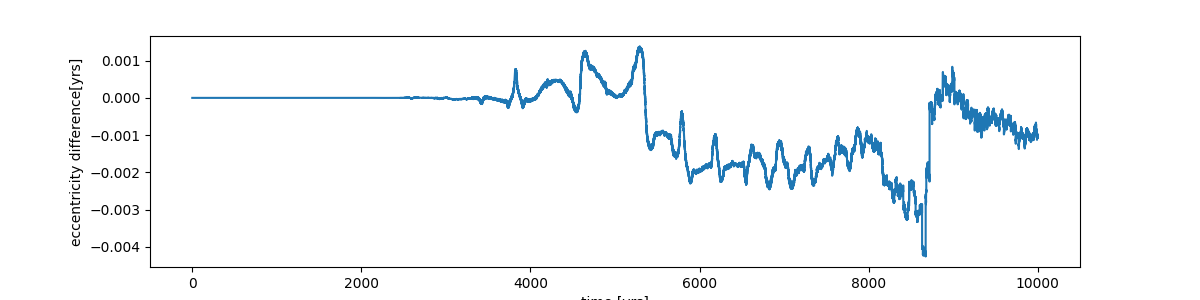

In [9]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("eccentricity difference[yrs]")
plt.plot(times, P_E-P_E_rad); #eccentrity



In [ ]:
print(np.average(P_C))
print(np.average(P_C_rad)) #period

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
distance_earth = np.sqrt(np.square(x[3]-x[2])+np.square(y[3]-y[2])+np.square(z[3]-z[2]))
ax.set_xlabel("time [yrs]")
ax.set_ylabel("period difference [days]")
#plt.plot(times, (P_C-P_C_rad)*(365.25*3600*24));
plt.plot(times, (P_C-P_C_rad)*(365.25));
ax.set_xlabel("time [yrs]")
#plt.plot(times, distance)
#plt.legend(['period variation','distance from sun','Radiation'])
plt.savefig('radiation_period_long')

In [ ]:
print((365)*0.005)

In [ ]:
#%matplotlib notebook
fig = plt.figure(figsize=(10,5))
#fig = plt.figure()
ax = plt.subplot(111)
distance = np.sqrt(np.square(x[2]-x[1])+np.square(y[2]-y[1])+np.square(z[2]-z[1]))
ax.set_xlabel("time [yrs]",fontsize=12)
ax.set_ylabel("distance difference [AU]",fontsize=12)
plt.legend(['distance variation','distance from sun','Radiation'])
ax.plot(times[:10000], distance_earth[:10000],color='silver');
ax.set_ylabel('distance from Earth [AU]', color='grey',fontsize=12)

#ax2.set_ylim(0.1,2)
#plt.plot(times, distance)
plt.legend(['distance from earth'],loc=2,fontsize=12)

ax2 = ax.twinx()
ax2.plot(times[:10000], distance[:10000]);
ax2.set_ylabel("distance difference [AU]",color='blue',fontsize=12)
#ax2.set_ylim(0,2.5)
ax2.xaxis.label.set_size(50)
plt.legend(['distance of shift','distance from sun','Radiation'],fontsize=12)


print(times[3000], distance[3000])
#plt.savefig('radiaton_medium')

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=(12,4.5))
ax = plt.subplot(111)
distance = np.sqrt(np.square(x[2]-x[1])+np.square(y[2]-y[1])+np.square(z[2]-z[1]))
distance2 = np.sqrt(np.square(x[1])+np.square(y[1])+np.square(z[1]))
ax.set_xlabel("time [yrs]",fontsize=12)
ax.set_ylabel("distance difference [AU]",color = 'cornflowerblue',fontsize=12)
plt.plot(times, distance);
plt.legend(['distance variation'],fontsize=12)
ax2 = ax.twinx()
ax2.plot(times, distance2,color='darkorange');
ax2.set_ylabel('distance from Sun [AU]', color='darkorange',fontsize=12)
ax2.set_ylim(0,1.6)

#plt.plot(times, distance)
plt.legend([' distance from sun','Radiation'],fontsize=12)
plt.savefig('radiaton_short')

In [ ]:
d_max = np.copy(distance)

In [ ]:
d_min = np.copy(distance)

In [ ]:
d_mean = np.copy(distance)

In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [ ]:
# d_mean = np.copy(distance)
# d_sun = np.copy(distance2)

%matplotlib notebook
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)
distance = np.sqrt(np.square(x[2]-x[1])+np.square(y[2]-y[1])+np.square(z[2]-z[1]))
distance2 = np.sqrt(np.square(x[1])+np.square(y[1])+np.square(z[1]))
ax.set_xlabel("time [yrs]",fontsize=15)
ax.set_ylabel("distance difference [AU]",color = 'cornflowerblue',fontsize=15)
plt.plot(times[:1000], d_mean[:1000]);
plt.plot(times[:1000], d_max[:1000],color = 'cornflowerblue', ls='--');
plt.plot(times[:1000], d_min[:1000],color = 'cornflowerblue', ls='--');
plt.legend(['distance variation','max and min beta values'],fontsize=15)
ax.fill_between(times,d_max,d_min,facecolor='lightgrey')
ax2 = ax.twinx()
ax2.plot(times[:1000], distance2[:1000],color='darkorange');
ax2.set_ylabel('distance from Sun [AU]', color='darkorange',fontsize=15)
ax2.set_ylim(0,2)

#plt.plot(times, distance)
plt.legend([' distance from sun','Radiation'],fontsize=15)
plt.savefig('radiaton_short')

<IPython.core.display.Javascript object>


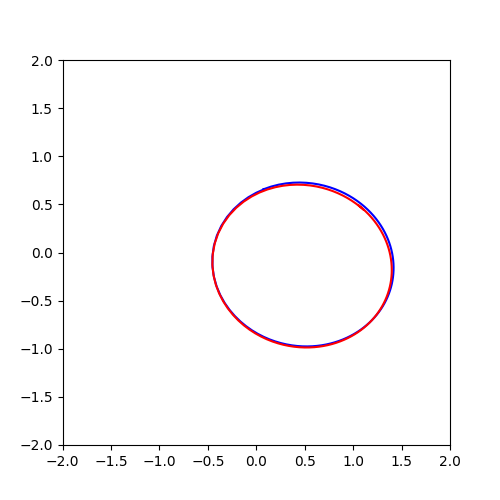

In [13]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(x[2][900000:900100], y[2][900000:900100],color='blue');
plt.plot(x[1][900000:900100], y[1][900000:900100],color='red');